In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib widget

In [4]:
houses = pd.read_csv("../data/King_County_House_prices_dataset.csv")

# Columns die erstmal weggelassen werden:
- id
- date
- yr_renovated
- zipcode, long, lat

In [5]:
columns_of_interest = list(houses.columns)

columns_of_interest = columns_of_interest[2:15] + columns_of_interest[19:]
print(columns_of_interest)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']


In [19]:
cont_columns = columns_of_interest[:5] + columns_of_interest[-5:]
print(cont_columns)

diff = lambda l1,l2: [x for x in l1 if x not in l2]
cat_columns = ["price"] + diff(columns_of_interest, cont_columns)
print(cat_columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']
['price', 'floors', 'waterfront', 'view', 'condition', 'grade']


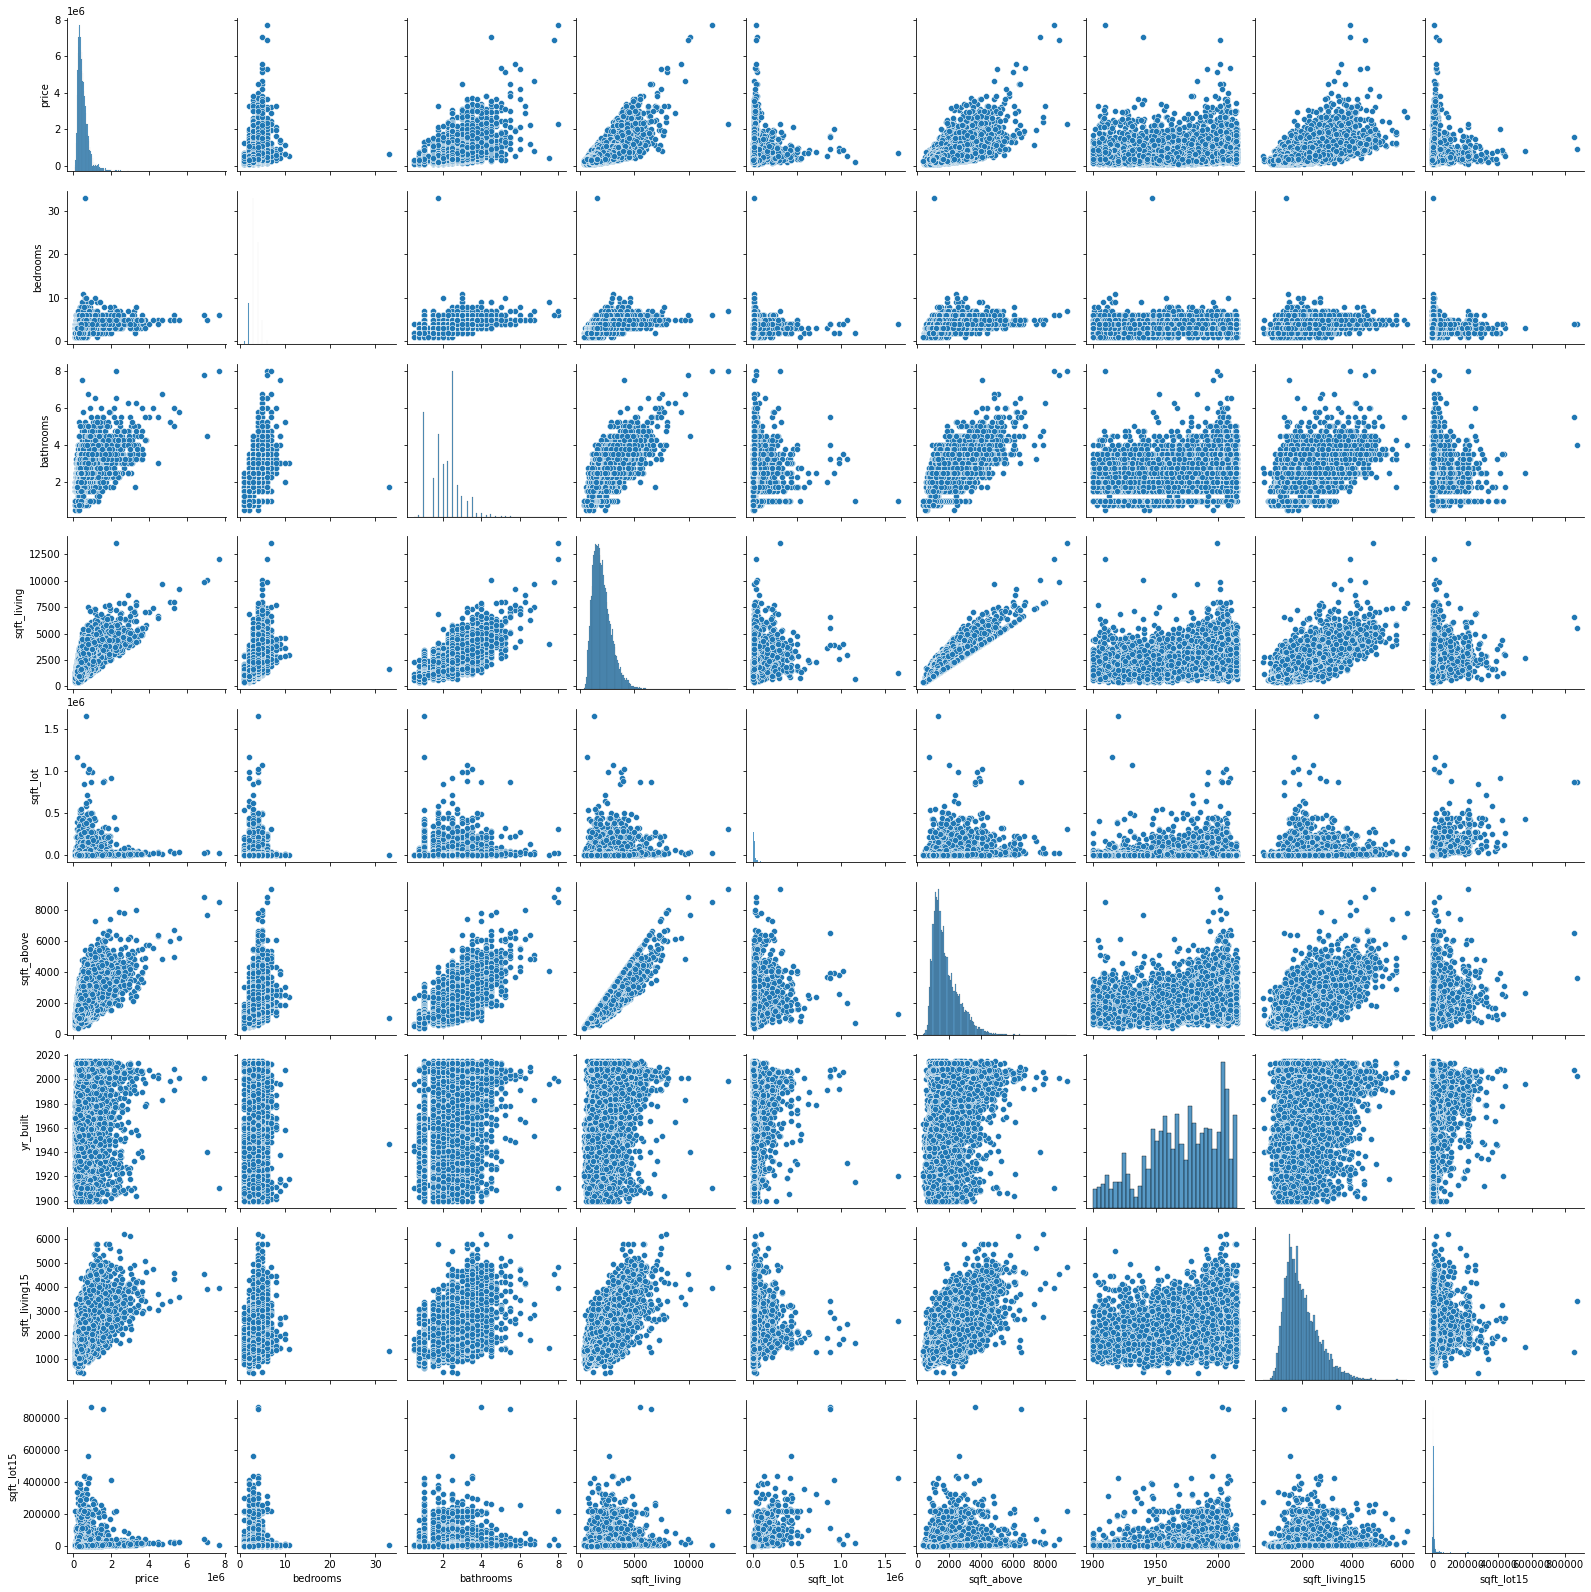

In [7]:
sns.pairplot(houses[cont_columns]);

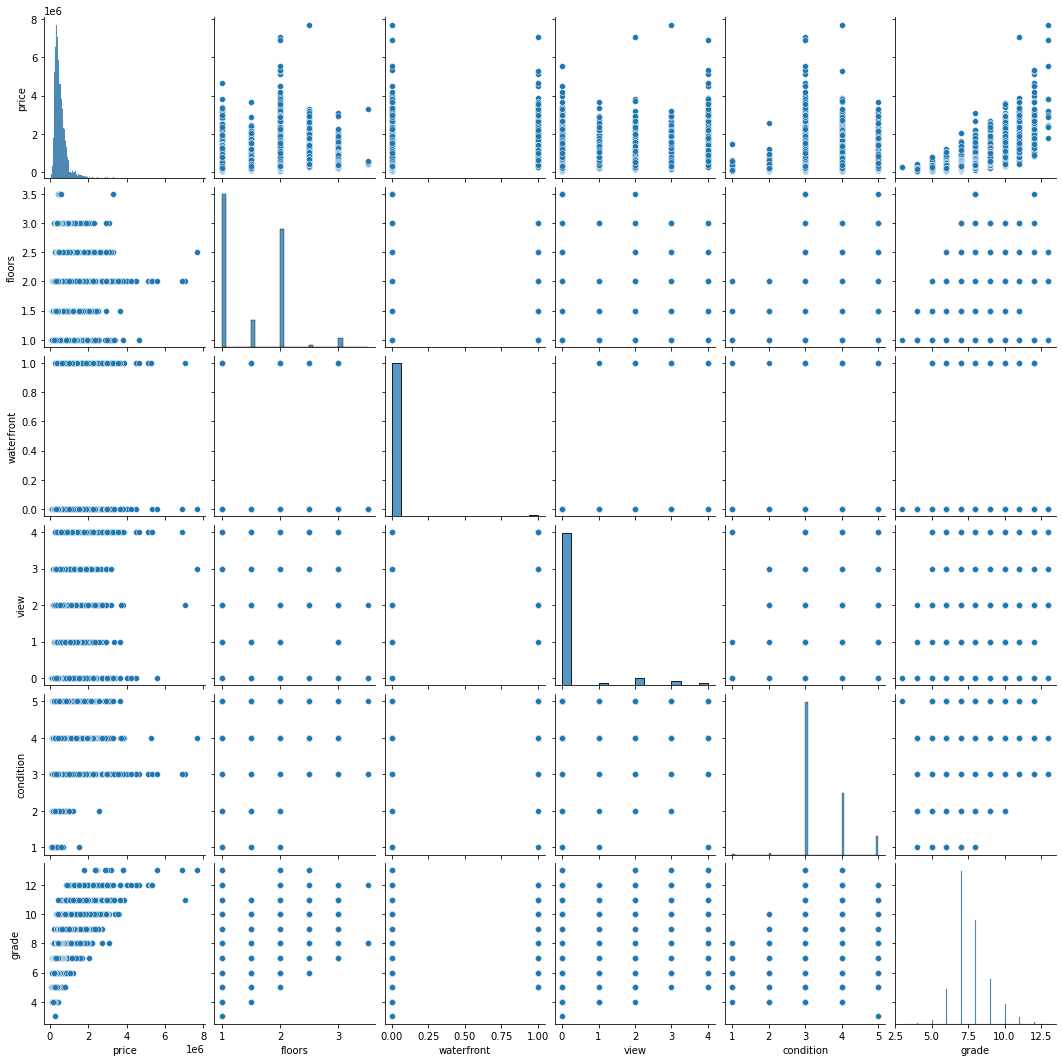

In [20]:
sns.pairplot(houses[cat_columns])

In [23]:
import statsmodels.api as sm
from itertools import combinations
import statsmodels.formula.api as smf

In [24]:
cont_columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'sqft_lot15']

In [27]:
rs = {}

for combo in combinations(cont_columns[1:], 2):
    model = 'price ~ {} + {}'.format(combo[0],combo[1])
    rs[(combo[0], combo[1])] = smf.ols(formula=model, data=houses).fit().rsquared

In [29]:
for k, v in rs.items():
    if v > 0.5 and v != 1:
        print(k, v)

('bedrooms', 'sqft_living') 0.5068428409838821
('sqft_living', 'sqft_basement') 0.5442062271705685
('sqft_living', 'yr_built') 0.5246022095932028
('sqft_above', 'sqft_basement') 0.5428091153941003


In [67]:
params = ["sqft_living", "bathrooms", "yr_built"]

model = "price ~ {} + {} + {}".format(*params)
result = smf.ols(formula=model, data=houses).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     8135.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:55:47   Log-Likelihood:            -2.9922e+05
No. Observations:               21597   AIC:                         5.985e+05
Df Residuals:                   21593   BIC:                         5.985e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.447e+06   1.32e+05     41.384      0.000    5.19e+06     5.7e+06
sqft_living   270.2765      2.868     94.233      0.000     264.655     275.898
bathrooms    6.242e+04   3766.864     16.571      0.000     5.5e+04    6.98e+04
yr_built    -2841.5200     68.113    -41.718      0.000   -2975.027   -2708.013
==============================================================================
Omnibus:                    14507.444   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           540174.977
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      26.885   Cond. No.                     2.26e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [69]:
result.params

Intercept      5.446602e+06
sqft_living    2.702765e+02
bathrooms      6.241907e+04
yr_built      -2.841520e+03
dtype: float64

In [70]:
b0 = result.params[0]
b1 = result.params[1]
b2 = result.params[2]
b3 = result.params[3]

mape(houses.price, b0 + b1*houses[params[0]] + b2*houses[params[1]] + b3*houses[params[2]])

0.34843269341610356

0.3553960138174197